# GAS STATIONS IN MEXICO

## Markdown (Carlos)

•	¿Existe una relación significativa entre el rating y el precio?
•	¿Existe una relación significativa entre la ubicación geográfica y el precio?
•	¿Los rating cero tienen una correlación con las zonas geográficas?
•	¿Existe una relación significativa entre tipo de gasolina y ubicación?




In [290]:
# Dependencies
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib.pyplot as plt
import requests
import json
from config import gkey


In [3]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

# 1. Use pandas to clean and format your dataset(s)

# 2. Create a Jupyter Notebook describing the data exploration and cleanup process

In [260]:
# Extracting Data from CSV to Jupyter-Notebook
prices_file = "Resources/prices.csv"
places_file = "Resources/places.csv"
prices_df = pd.read_csv(prices_file)
places_df = pd.read_csv(places_file)

In [5]:
# Cleaning Columns on Prices DataFrame
prices_df = prices_df.drop('places', axis = 1)
prices_df = prices_df.drop('place', axis = 1)
prices_df

,place_id,gas_price,type
0,11703.0,18.69,regular
1,NaN,19.69,premium
2,11702.0,18.19,regular
3,NaN,19.79,premium
4,NaN,18.25,diesel
...,...,...,...
33210,NaN,19.59,premium
33211,NaN,18.60,diesel
33212,2807.0,17.99,regular
33213,2807.0,19.99,premium


In [6]:
# Creating a column to replace NaNs with Places_ID
Place_ID = prices_df['place_id'].fillna(method='ffill')
# Adding Column to existing prices DataFrame
prices_df['Place_ID'] = Place_ID
# Eliminating original place_id from DataFrame
prices_df = prices_df.drop('place_id', axis = 1)
# Rearrange DataFrame
prices_df = prices_df[['Place_ID','gas_price','type']]
# Rename Place_ID
prices_df.columns = ['_place_id', 'gas_price','type']
prices_df

,_place_id,gas_price,type
0,11703.0,18.69,regular
1,11703.0,19.69,premium
2,11702.0,18.19,regular
3,11702.0,19.79,premium
4,11702.0,18.25,diesel
...,...,...,...
33210,11704.0,19.59,premium
33211,11704.0,18.60,diesel
33212,2807.0,17.99,regular
33213,2807.0,19.99,premium


In [7]:
# Merging DataFrames and Renaming column _place_id
Gas_Stations_df = pd.merge(places_df, prices_df, on="_place_id")
Gas_Stations_df = Gas_Stations_df.rename(columns={"_place_id":"place_id",
                                                 "location/x":"Lng",
                                                 "location/y":"Lat",
                                                 "type":"gas type"})
Gas_Stations_df


,name,cre_id,Lng,Lat,place_id,gas_price,gas type
0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular
1,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,19.35,premium
2,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,18.45,diesel
3,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular
4,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.99,premium
...,...,...,...,...,...,...,...
33210,GRUPO GASOLINERO DEL DIAMANTE HOLZ SA DE CV,PL/23508/EXP/ES/2020,-103.40990,22.83751,27300,18.59,premium
33211,GRUPO GASOLINERO DEL DIAMANTE HOLZ SA DE CV,PL/23508/EXP/ES/2020,-103.40990,22.83751,27300,18.89,diesel
33212,JAGREGAS 2 S.A. DE C.V.,PL/23510/EXP/ES/2020,-100.41290,20.67198,27304,16.99,regular
33213,JAGREGAS 2 S.A. DE C.V.,PL/23510/EXP/ES/2020,-100.41290,20.67198,27304,17.30,premium


In [8]:
gas_id = Gas_Stations_df.drop_duplicates(subset="place_id")
gas_id = gas_id.reset_index(drop=False)
gas_id

,index,name,cre_id,Lng,Lat,place_id,gas_price,gas type
0,0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular
1,3,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular
2,6,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,12.82,regular
3,8,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.64,regular
4,11,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,14.79,regular
...,...,...,...,...,...,...,...,...
12455,33200,MEGA GASOLINERAS S.A DE C.V,PL/23515/EXP/ES/2020,-101.34460,20.72499,27295,18.79,regular
12456,33203,"GRUPO ENERGETICO GUDE, S.A. DE C.V.",PL/23507/EXP/ES/2020,-102.88500,23.16178,27298,18.15,regular
12457,33206,MEGA GASOLINERAS S.A DE C.V,PL/23513/EXP/ES/2020,-101.36640,20.68246,27299,18.25,regular
12458,33209,GRUPO GASOLINERO DEL DIAMANTE HOLZ SA DE CV,PL/23508/EXP/ES/2020,-103.40990,22.83751,27300,17.89,regular


In [9]:
gas_id["Rating"] = ""
gas_id["User Ratings"] ="" 
gas_id["Google_Name"] = ""
gas_id["Address"]= ""
gas_id["Types"]= ""
gas_id.head()

,index,name,cre_id,Lng,Lat,place_id,gas_price,gas type,Rating,User Ratings,Google_Name,Address,Types
0,0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular,,,,,
1,3,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular,,,,,
2,6,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,12.82,regular,,,,,
3,8,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.64,regular,,,,,
4,11,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,14.79,regular,,,,,


In [10]:
params = {
    "rankby":"distance",
    "type": "gas_station",
    "keyword": "fuel station",
    "key": gkey    
}

# Hit the Google Places API for each city's coordinates.
url_base = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

In [12]:
carlos_df = gas_id.iloc[0:2491,:]
rodrigo_df = gas_id.iloc[2491:4983,:]
pau_df = gas_id.iloc[4983:7475,:]
eduardo_df = gas_id.iloc[7475:9967,:]
sam_df =  gas_id.iloc[9967:12460,:]

In [22]:
# Store the first Hotel result into the DataFrame.
json_list = []
for index, row in pau_df.iterrows():
    lat=row["Lat"]
    lon=row["Lng"]
        
    params["location"] = f"{lat},{lon}"
    
    print(f"Results for observation: {index}")
    try:
        response = requests.get(url_base, params=params).json()
        pau_df.loc[index, "Rating"] = response["results"][0]["rating"]
        pau_df.loc[index, "User Ratings"] = response["results"][0]["user_ratings_total"]
        pau_df.loc[index, "Google_Name"] = response["results"][0]["name"]
        pau_df.loc[index, "Address"] = response["results"][0]["vicinity"]
        string = response["results"][0]["types"]
        string_value = listToString(string)
        string_value = string_value.replace(" ",", ")
        pau_df.loc[index, "Types"] = string_value
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

# To storage the requests
        json_list.append(response)
    

    

Results for observation: 4983


C:\Users\Carlo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Results for observation: 4984
Results for observation: 4985
Results for observation: 4986
Results for observation: 4987
Results for observation: 4988
Results for observation: 4989
Results for observation: 4990
Results for observation: 4991
Results for observation: 4992
Results for observation: 4993
Results for observation: 4994
Results for observation: 4995
Results for observation: 4996
Results for observation: 4997
Results for observation: 4998
Results for observation: 4999
Results for observation: 5000
Results for observation: 5001
Results for observation: 5002
Results for observation: 5003
Results for observation: 5004
Results for observation: 5005
Results for observation: 5006
Results for observation: 5007
Results for observation: 5008
Results for observation: 5009
Results for observation: 5010
Results for observation: 5011
Results for observation: 5012
Results for observation: 5013
Results for observation: 5014
Results for observation: 5015
Results for observation: 5016
Results fo

Results for observation: 5256
Results for observation: 5257
Results for observation: 5258
Results for observation: 5259
Results for observation: 5260
Results for observation: 5261
Results for observation: 5262
Results for observation: 5263
Results for observation: 5264
Results for observation: 5265
Results for observation: 5266
Results for observation: 5267
Results for observation: 5268
Results for observation: 5269
Results for observation: 5270
Results for observation: 5271
Results for observation: 5272
Results for observation: 5273
Results for observation: 5274
Results for observation: 5275
Results for observation: 5276
Results for observation: 5277
Results for observation: 5278
Results for observation: 5279
Results for observation: 5280
Results for observation: 5281
Results for observation: 5282
Results for observation: 5283
Results for observation: 5284
Results for observation: 5285
Results for observation: 5286
Results for observation: 5287
Results for observation: 5288
Results fo

Results for observation: 5530
Results for observation: 5531
Results for observation: 5532
Results for observation: 5533
Results for observation: 5534
Results for observation: 5535
Results for observation: 5536
Results for observation: 5537
Results for observation: 5538
Results for observation: 5539
Results for observation: 5540
Results for observation: 5541
Results for observation: 5542
Results for observation: 5543
Results for observation: 5544
Results for observation: 5545
Results for observation: 5546
Results for observation: 5547
Results for observation: 5548
Results for observation: 5549
Results for observation: 5550
Results for observation: 5551
Results for observation: 5552
Results for observation: 5553
Results for observation: 5554
Results for observation: 5555
Results for observation: 5556
Results for observation: 5557
Results for observation: 5558
Results for observation: 5559
Results for observation: 5560
Results for observation: 5561
Results for observation: 5562
Results fo

Results for observation: 5804
Results for observation: 5805
Results for observation: 5806
Results for observation: 5807
Results for observation: 5808
Results for observation: 5809
Results for observation: 5810
Results for observation: 5811
Results for observation: 5812
Results for observation: 5813
Results for observation: 5814
Results for observation: 5815
Results for observation: 5816
Results for observation: 5817
Results for observation: 5818
Results for observation: 5819
Results for observation: 5820
Results for observation: 5821
Results for observation: 5822
Results for observation: 5823
Results for observation: 5824
Results for observation: 5825
Results for observation: 5826
Results for observation: 5827
Results for observation: 5828
Results for observation: 5829
Results for observation: 5830
Results for observation: 5831
Results for observation: 5832
Results for observation: 5833
Results for observation: 5834
Results for observation: 5835
Results for observation: 5836
Results fo

Results for observation: 6078
Results for observation: 6079
Results for observation: 6080
Results for observation: 6081
Results for observation: 6082
Results for observation: 6083
Results for observation: 6084
Results for observation: 6085
Results for observation: 6086
Results for observation: 6087
Results for observation: 6088
Results for observation: 6089
Results for observation: 6090
Results for observation: 6091
Results for observation: 6092
Results for observation: 6093
Results for observation: 6094
Results for observation: 6095
Results for observation: 6096
Results for observation: 6097
Results for observation: 6098
Results for observation: 6099
Results for observation: 6100
Results for observation: 6101
Results for observation: 6102
Results for observation: 6103
Results for observation: 6104
Results for observation: 6105
Results for observation: 6106
Results for observation: 6107
Results for observation: 6108
Results for observation: 6109
Results for observation: 6110
Results fo

Results for observation: 6352
Results for observation: 6353
Results for observation: 6354
Results for observation: 6355
Results for observation: 6356
Results for observation: 6357
Results for observation: 6358
Results for observation: 6359
Results for observation: 6360
Results for observation: 6361
Results for observation: 6362
Results for observation: 6363
Results for observation: 6364
Results for observation: 6365
Results for observation: 6366
Results for observation: 6367
Results for observation: 6368
Results for observation: 6369
Results for observation: 6370
Results for observation: 6371
Results for observation: 6372
Results for observation: 6373
Results for observation: 6374
Results for observation: 6375
Results for observation: 6376
Results for observation: 6377
Results for observation: 6378
Results for observation: 6379
Results for observation: 6380
Results for observation: 6381
Results for observation: 6382
Results for observation: 6383
Results for observation: 6384
Results fo

Results for observation: 6626
Results for observation: 6627
Results for observation: 6628
Results for observation: 6629
Results for observation: 6630
Results for observation: 6631
Results for observation: 6632
Results for observation: 6633
Results for observation: 6634
Results for observation: 6635
Results for observation: 6636
Results for observation: 6637
Results for observation: 6638
Results for observation: 6639
Results for observation: 6640
Results for observation: 6641
Results for observation: 6642
Results for observation: 6643
Results for observation: 6644
Results for observation: 6645
Results for observation: 6646
Results for observation: 6647
Results for observation: 6648
Results for observation: 6649
Results for observation: 6650
Results for observation: 6651
Results for observation: 6652
Results for observation: 6653
Results for observation: 6654
Results for observation: 6655
Results for observation: 6656
Results for observation: 6657
Results for observation: 6658
Results fo

Results for observation: 6900
Results for observation: 6901
Results for observation: 6902
Results for observation: 6903
Results for observation: 6904
Results for observation: 6905
Results for observation: 6906
Results for observation: 6907
Results for observation: 6908
Results for observation: 6909
Results for observation: 6910
Results for observation: 6911
Results for observation: 6912
Results for observation: 6913
Results for observation: 6914
Results for observation: 6915
Results for observation: 6916
Results for observation: 6917
Results for observation: 6918
Results for observation: 6919
Results for observation: 6920
Results for observation: 6921
Results for observation: 6922
Results for observation: 6923
Results for observation: 6924
Results for observation: 6925
Results for observation: 6926
Results for observation: 6927
Results for observation: 6928
Results for observation: 6929
Results for observation: 6930
Results for observation: 6931
Results for observation: 6932
Results fo

Results for observation: 7174
Results for observation: 7175
Results for observation: 7176
Results for observation: 7177
Results for observation: 7178
Results for observation: 7179
Results for observation: 7180
Results for observation: 7181
Results for observation: 7182
Results for observation: 7183
Results for observation: 7184
Results for observation: 7185
Results for observation: 7186
Results for observation: 7187
Results for observation: 7188
Results for observation: 7189
Results for observation: 7190
Results for observation: 7191
Results for observation: 7192
Results for observation: 7193
Results for observation: 7194
Results for observation: 7195
Results for observation: 7196
Results for observation: 7197
Results for observation: 7198
Results for observation: 7199
Results for observation: 7200
Results for observation: 7201
Results for observation: 7202
Results for observation: 7203
Results for observation: 7204
Results for observation: 7205
Results for observation: 7206
Results fo

Results for observation: 7448
Results for observation: 7449
Results for observation: 7450
Results for observation: 7451
Results for observation: 7452
Results for observation: 7453
Results for observation: 7454
Results for observation: 7455
Results for observation: 7456
Results for observation: 7457
Results for observation: 7458
Results for observation: 7459
Results for observation: 7460
Results for observation: 7461
Results for observation: 7462
Results for observation: 7463
Results for observation: 7464
Results for observation: 7465
Results for observation: 7466
Results for observation: 7467
Results for observation: 7468
Results for observation: 7469
Results for observation: 7470
Results for observation: 7471
Results for observation: 7472
Results for observation: 7473
Results for observation: 7474


In [24]:
part3 = pau_df


In [14]:
pau_df

,index,name,cre_id,Lng,Lat,place_id,gas_price,gas type,Rating,User Ratings,Google_Name,Address,Types
4983,13215,Servicio La Parada SA de CV,PL/4839/EXP/ES/2015,-98.05087,19.38949,7165,17.98,regular,,,,,
4984,13218,SERVIARAGON S.A DE C.V,PL/4695/EXP/ES/2015,-98.61885,18.31530,7166,18.89,regular,,,,,
4985,13221,Operadora de Gasolineras A.P. S.A. de C.V.,PL/4911/EXP/ES/2015,-99.69855,19.28886,7167,17.73,regular,,,,,
4986,13224,GASOLINERA CRISTOBAL COLON DE JUCHITAN S.A. DE...,PL/3531/EXP/ES/2015,-95.02547,16.44553,7168,18.39,regular,,,,,
4987,13227,"CARBURANTES, S.A. DE C.V.",PL/4838/EXP/ES/2015,-99.51218,27.47712,7169,12.89,regular,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7470,19760,"ESTACIONES MEXSON, S.A. DE C.V.",PL/8528/EXP/ES/2015,-115.51610,32.65589,9656,16.79,regular,,,,,
7471,19762,EVERARDO LARA COVARRUBIAS,PL/8697/EXP/ES/2015,-98.93101,19.41723,9657,17.60,regular,,,,,
7472,19765,SERVICIO COMONFORT SA DE CV,PL/8719/EXP/ES/2015,-99.13486,19.44478,9658,18.31,regular,,,,,
7473,19767,ALFONSO COBIAN RAMIREZ,PL/8382/EXP/ES/2015,-105.09400,20.82121,9659,19.69,regular,,,,,


In [2]:
# Eduardo (Imported the files from resources)

part1 = "Resources/part1.csv"
part2 = "Resources/part2.csv"
part3 = "Resources/part3.csv"
part4 = "Resources/part4.csv"
part5 = "Resources/part5.csv"
part1_df = pd.read_csv(part1)
part2_df = pd.read_csv(part2)
part3_df = pd.read_csv(part3)
part4_df = pd.read_csv(part4)
part5_df = pd.read_csv(part5)

In [3]:
# Concatinate all of the DataFrames into one

Frames = [part1_df,part2_df,part3_df,part4_df,part5_df]
Mexico_Gas_Stations = pd.concat(Frames)
Mexico_Gas_Stations

,Unnamed: 0,index,name,cre_id,Lng,Lat,place_id,gas_price,gas type,Rating,User Ratings,Google_Name,Address,Types
0,0,0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular,4.3,3.0,Gasolinera Pemex,"Av de los Insurgentes No. 1910, Libramiento, T...","gas_station, point_of_interest, establishment"
1,1,3,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular,3.9,13.0,Pemex,"Carrt. Pachuca-Queretaro Km 58+500, Huichapan","gas_station, point_of_interest, establishment"
2,2,6,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,12.82,regular,4.3,261.0,TotalGas,"Av. López Mateos 1604, La Plata, Cd Juárez","gas_station, point_of_interest, establishment"
3,3,8,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.64,regular,4.0,105.0,Gasolinera Pemex,"Perif. Nte. Ricardo Flores Magón Ote. No. 950,...","gas_station, point_of_interest, establishment"
4,4,11,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,14.79,regular,4.0,10.0,Petromax,"Río Purificación 800, Luis Donaldo Colosio Mur...","gas_station, point_of_interest, establishment"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,12455,33200,MEGA GASOLINERAS S.A DE C.V,PL/23515/EXP/ES/2020,-101.34460,20.72499,27295,18.79,regular,3.0,2.0,Servicio Independencia,Ave Siglo XXI 700,"gas_station, point_of_interest, establishment"
2489,12456,33203,"GRUPO ENERGETICO GUDE, S.A. DE C.V.",PL/23507/EXP/ES/2020,-102.88500,23.16178,27298,18.15,regular,4.7,3.0,GUDE 4,Fresnillo,"gas_station, point_of_interest, establishment"
2490,12457,33206,MEGA GASOLINERAS S.A DE C.V,PL/23513/EXP/ES/2020,-101.36640,20.68246,27299,18.25,regular,2.0,1.0,Gasolineros Unidos de Irapuato,"Héroes de Nacozari S/N, Nuevos Colonos Unidos,...","gas_station, point_of_interest, establishment"
2491,12458,33209,GRUPO GASOLINERO DEL DIAMANTE HOLZ SA DE CV,PL/23508/EXP/ES/2020,-103.40990,22.83751,27300,17.89,regular,3.5,2.0,Grupo Gasolinero Rivas,"Ranchito de la Cruz, Valparaíso","gas_station, point_of_interest, establishment"


In [4]:
#Looking for missings
Mexico_Gas_Stations.isna().sum()/len(Mexico_Gas_Stations) 



Unnamed: 0      0.000000
index           0.000000
name            0.000000
cre_id          0.000000
Lng             0.000000
Lat             0.000000
place_id        0.000000
gas_price       0.000000
gas type        0.000000
Rating          0.001926
User Ratings    0.001926
Google_Name     0.001926
Address         0.001926
Types           0.001926
dtype: float64

In [5]:
# 24 missing values, let's see just in user ratings, rating google name and address
Mexico_Gas_Stations_nas = Mexico_Gas_Stations[Mexico_Gas_Stations['Rating'].isna()]

Mexico_Gas_Stations_nas

,Unnamed: 0,index,name,cre_id,Lng,Lat,place_id,gas_price,gas type,Rating,User Ratings,Google_Name,Address,Types
1142,3633,9662,"SOLUCIONES P&L, S.A.P.I. DE C.V.",PL/4659/EXP/ES/2015,19.41447,-99.03223,5812,18.55,regular,NaN,NaN,NaN,NaN,NaN
1172,3663,9740,SERVICIOS ABBA DEL FUERTE S A,PL/3417/EXP/ES/2015,-108.37380,26.41212,5842,19.75,regular,NaN,NaN,NaN,NaN,NaN
1182,3673,9764,"SOLUCIONES P&L, S.A.P.I. DE C.V.",PL/4663/EXP/ES/2015,19.38820,-99.02986,5852,18.55,regular,NaN,NaN,NaN,NaN,NaN
1292,3783,10044,ESTACION DE SERVICIO TEIKA SA DE CV,PL/3287/EXP/ES/2015,-104.52840,28.41779,5962,18.79,regular,NaN,NaN,NaN,NaN,NaN
2351,4842,12842,"SOLUCIONES P&L, S.A.P.I. DE C.V.",PL/4713/EXP/ES/2015,19.48694,-99.03712,7024,18.69,regular,NaN,NaN,NaN,NaN,NaN
2473,4964,13163,"SOLUCIONES P&L, S.A.P.I. DE C.V.",PL/4664/EXP/ES/2015,19.35144,-98.85688,7146,18.49,regular,NaN,NaN,NaN,NaN,NaN
217,5200,13798,GRUPO IMPULSORA MOCTEZUMA SPR DE RL DE CV,PL/3800/EXP/ES/2015,-104.60030,28.87011,7382,17.99,regular,NaN,NaN,NaN,NaN,NaN
167,10134,26822,GASOLINERA SIMON BOLIVAR,PL/11420/EXP/ES/2015,-103.22770,24.68618,13558,19.99,regular,NaN,NaN,NaN,NaN,NaN
213,10180,26943,MAXIMIANO ALVAREZ AMADOR,PL/11388/EXP/ES/2015,-111.30150,24.49053,13644,20.40,regular,NaN,NaN,NaN,NaN,NaN
407,10374,27452,"ALCA ENERGETICA, S.A. DE C.V",PL/12011/EXP/ES/2015,-88.13531,29.69880,14043,18.99,regular,NaN,NaN,NaN,NaN,NaN


In [6]:
# duplicates
duplicated = Mexico_Gas_Stations[["Lng","Lat"]].duplicated().sum()
duplicated

1

In [7]:
# identifying 
duplicated_station = Mexico_Gas_Stations.loc[Mexico_Gas_Stations[["name","Lat","Lng"]].duplicated(),"name"]
duplicated_station

2230    ADMINISTRADORA DEL COLORADO S. DE R.L. DE C.V.
Name: name, dtype: object

In [8]:
# drop duplicted
Mexico_Gas_Stations2 = Mexico_Gas_Stations.drop_duplicates()
Mexico_Gas_Stations2.tail()

,Unnamed: 0,index,name,cre_id,Lng,Lat,place_id,gas_price,gas type,Rating,User Ratings,Google_Name,Address,Types
2488,12455,33200,MEGA GASOLINERAS S.A DE C.V,PL/23515/EXP/ES/2020,-101.3446,20.72499,27295,18.79,regular,3.0,2.0,Servicio Independencia,Ave Siglo XXI 700,"gas_station, point_of_interest, establishment"
2489,12456,33203,"GRUPO ENERGETICO GUDE, S.A. DE C.V.",PL/23507/EXP/ES/2020,-102.8850,23.16178,27298,18.15,regular,4.7,3.0,GUDE 4,Fresnillo,"gas_station, point_of_interest, establishment"
2490,12457,33206,MEGA GASOLINERAS S.A DE C.V,PL/23513/EXP/ES/2020,-101.3664,20.68246,27299,18.25,regular,2.0,1.0,Gasolineros Unidos de Irapuato,"Héroes de Nacozari S/N, Nuevos Colonos Unidos,...","gas_station, point_of_interest, establishment"
2491,12458,33209,GRUPO GASOLINERO DEL DIAMANTE HOLZ SA DE CV,PL/23508/EXP/ES/2020,-103.4099,22.83751,27300,17.89,regular,3.5,2.0,Grupo Gasolinero Rivas,"Ranchito de la Cruz, Valparaíso","gas_station, point_of_interest, establishment"
2492,12459,33212,JAGREGAS 2 S.A. DE C.V.,PL/23510/EXP/ES/2020,-100.4129,20.67198,27304,16.99,regular,4.0,8.0,JAGREGAS 2,"Anillo Vial Fray Junípero Serra 102, Santiago ...","gas_station, point_of_interest, establishment"


In [48]:
# we eliminate 24 missing values to get 12,435 gas stations
Mexico_Gas_Stations3 = Mexico_Gas_Stations2.dropna()
Mexico_Gas_Stations3

,Unnamed: 0,index,name,cre_id,Lng,Lat,place_id,gas_price,gas type,Rating,User Ratings,Google_Name,Address,Types
0,0,0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular,4.3,3.0,Gasolinera Pemex,"Av de los Insurgentes No. 1910, Libramiento, T...","gas_station, point_of_interest, establishment"
1,1,3,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular,3.9,13.0,Pemex,"Carrt. Pachuca-Queretaro Km 58+500, Huichapan","gas_station, point_of_interest, establishment"
2,2,6,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,12.82,regular,4.3,261.0,TotalGas,"Av. López Mateos 1604, La Plata, Cd Juárez","gas_station, point_of_interest, establishment"
3,3,8,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.64,regular,4.0,105.0,Gasolinera Pemex,"Perif. Nte. Ricardo Flores Magón Ote. No. 950,...","gas_station, point_of_interest, establishment"
4,4,11,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,14.79,regular,4.0,10.0,Petromax,"Río Purificación 800, Luis Donaldo Colosio Mur...","gas_station, point_of_interest, establishment"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,12455,33200,MEGA GASOLINERAS S.A DE C.V,PL/23515/EXP/ES/2020,-101.34460,20.72499,27295,18.79,regular,3.0,2.0,Servicio Independencia,Ave Siglo XXI 700,"gas_station, point_of_interest, establishment"
2489,12456,33203,"GRUPO ENERGETICO GUDE, S.A. DE C.V.",PL/23507/EXP/ES/2020,-102.88500,23.16178,27298,18.15,regular,4.7,3.0,GUDE 4,Fresnillo,"gas_station, point_of_interest, establishment"
2490,12457,33206,MEGA GASOLINERAS S.A DE C.V,PL/23513/EXP/ES/2020,-101.36640,20.68246,27299,18.25,regular,2.0,1.0,Gasolineros Unidos de Irapuato,"Héroes de Nacozari S/N, Nuevos Colonos Unidos,...","gas_station, point_of_interest, establishment"
2491,12458,33209,GRUPO GASOLINERO DEL DIAMANTE HOLZ SA DE CV,PL/23508/EXP/ES/2020,-103.40990,22.83751,27300,17.89,regular,3.5,2.0,Grupo Gasolinero Rivas,"Ranchito de la Cruz, Valparaíso","gas_station, point_of_interest, establishment"


In [49]:
Mexico_Gas_Stations3.describe()

,Unnamed: 0,index,Lng,Lat,place_id,gas_price,Rating,User Ratings
count,12436.000000,12436.000000,12436.000000,12436.000000,12436.000000,12436.000000,12436.000000,12436.000000
mean,6223.539482,16493.477565,-101.111736,22.362393,9767.510293,18.392517,3.295360,54.468318
std,3594.994745,9534.399690,8.734461,4.167085,6209.721509,1.393100,1.487949,110.470165
min,0.000000,0.000000,-117.120200,14.672430,2039.000000,0.010000,0.000000,0.000000
25%,3108.750000,8274.250000,-103.455025,19.397077,5283.750000,17.890000,3.400000,2.000000
50%,6224.500000,16505.500000,-100.366150,20.685200,8407.500000,18.590000,3.800000,17.000000
75%,9333.250000,24706.750000,-98.421830,25.553805,11668.250000,19.200000,4.100000,61.000000
max,12459.000000,33212.000000,108.092100,32.716290,27304.000000,25.050000,5.000000,2374.000000


 #  <span style="color:blue"> Statistical Analysis </span>

In [50]:
countby_type_df = Mexico_Gas_Stations3.groupby(Mexico_Gas_Stations3["gas type"]).count()["place_id"].to_frame()

countby_type_df

,cre_id
gas type,
diesel,821
premium,753
regular,10862


<AxesSubplot:ylabel='cre_id'>

<Figure size 864x576 with 0 Axes>

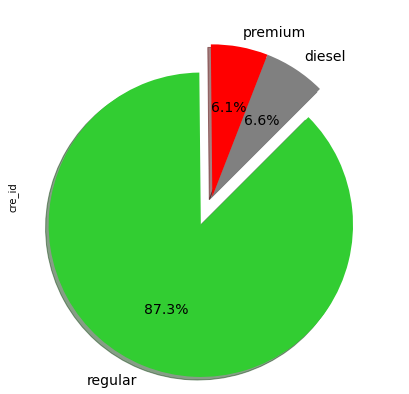

In [350]:
plt.figure(figsize=(12,8))
colors = ["grey", "red", "limegreen"]
plt.figure(figsize=(15,15))
axes = plt.subplot(122, aspect="equal")
explode = (0,0,0.2)
countby_type_df.plot(kind="pie",explode=explode, autopct="%1.1f%%", colors=colors, ax=axes, y = "cre_id", startangle=45, shadow=True, legend = False,fontsize=14)

## <span style="color:blue"> Rating Analysis </span>

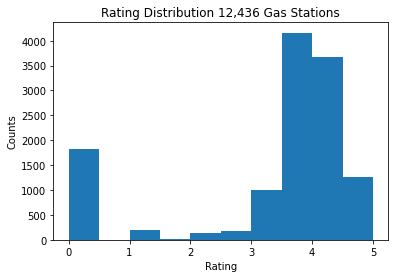

In [181]:
# Distribution shows a ditribution mean of 3.29, standard deviation is 1.5 or so. 
plt.hist(Mexico_Gas_Stations3["Rating"], bins=10)
plt.title("Rating Distribution 12,436 Gas Stations")
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

array([[<AxesSubplot:title={'center':'diesel'}>,
        <AxesSubplot:title={'center':'premium'}>],
       [<AxesSubplot:title={'center':'regular'}>, <AxesSubplot:>]],
      dtype=object)

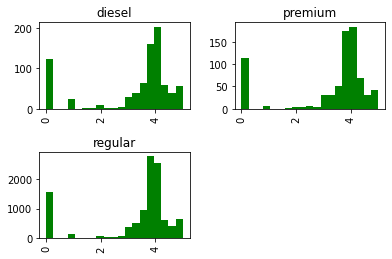

In [186]:
# The rating distribution is very similar for each sort of fuel
Mexico_Gas_Stations3["Rating"].hist(by=Mexico_Gas_Stations3["gas type"], bins=19, color="green")
# poner juntas esta de rating y la de precios


In [53]:
# At first glance
Mexico_Gas_Stations3["Rating"].describe()

count    12436.000000
mean         3.295360
std          1.487949
min          0.000000
25%          3.400000
50%          3.800000
75%          4.100000
max          5.000000
Name: Rating, dtype: float64

In [57]:
# lets know better distribution by ranges
pd.qcut(Mexico_Gas_Stations3["Rating"],6)

0          (4.2, 5.0]
1          (3.8, 4.0]
2          (4.2, 5.0]
3          (3.8, 4.0]
4          (3.8, 4.0]
            ...      
2488       (2.0, 3.6]
2489       (4.2, 5.0]
2490    (-0.001, 2.0]
2491       (2.0, 3.6]
2492       (3.8, 4.0]
Name: Rating, Length: 12436, dtype: category
Categories (6, interval[float64]): [(-0.001, 2.0] < (2.0, 3.6] < (3.6, 3.8] < (3.8, 4.0] < (4.0, 4.2] < (4.2, 5.0]]

In [225]:
# bins for Rating
np.percentile(Mexico_Gas_Stations3["Rating"], np.arange(0,100, 20))
bins = [-0.001,2,3.6,3.8,4,4.2,5]
names = ["<1.99", "2-3.59", "3.6-3.79", "3.8-3.99","4-4.19", "4.2-5"]
bins_rating = Mexico_Gas_Stations3
bins_rating["Gas Stations Rating"]=pd.cut(bins_rating["Rating"], bins, labels=names)
bins_rating= bins_rating.groupby(["Gas Stations Rating"])
bins_rating1= bins_rating[["Gas Stations Rating","gas_price", "Rating", "User Ratings"]]
A = bins_rating1.mean()
A
#quitar outliers, para quitar máximos

d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gas_price,Rating,User Ratings
Gas Stations Rating,,,
<1.99,18.371069,0.189215,0.231788
2-3.59,18.475639,3.306285,45.821912
3.6-3.79,18.397270,3.756244,96.868682
3.8-3.99,18.369929,3.957272,76.357115
4-4.19,18.320155,4.140903,82.908356
4.2-5,18.397540,4.639357,29.952309


array([<AxesSubplot:title={'center':'gas_price'}, xlabel='Gas Stations Rating'>,
       <AxesSubplot:title={'center':'Rating'}, xlabel='Gas Stations Rating'>,
       <AxesSubplot:title={'center':'User Ratings'}, xlabel='Gas Stations Rating'>],
      dtype=object)

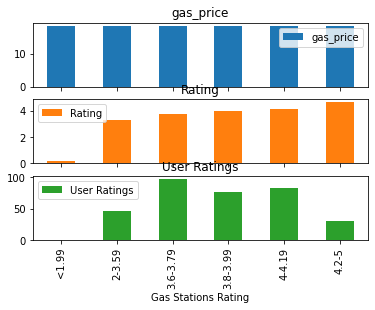

In [227]:
A.plot(kind="bar", subplots=True)

In [133]:
bins_rating2= bins_rating[["place_id"]]
counts_byrating = bins_rating2.count()
counts_byrating

,place_id
Gas Stations Rating,
<1.99,2114
2-3.59,2291
3.6-3.79,2018
3.8-3.99,2537
4-4.19,1484
4.2-5,1992


<AxesSubplot:xlabel='Gas Stations Rating'>

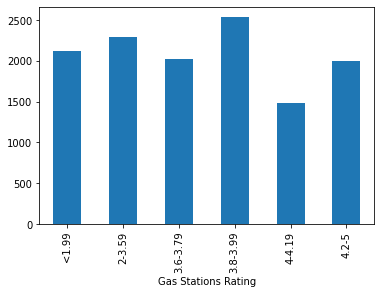

In [117]:
counts_byrating["place_id"].plot(kind="bar") 

<AxesSubplot:ylabel='place_id'>

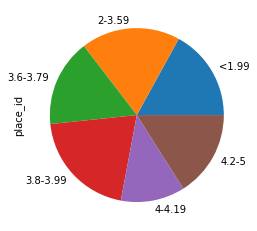

In [116]:
counts_byrating["place_id"].plot(kind="pie") 

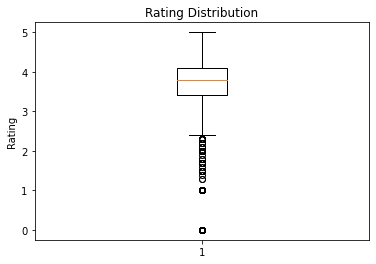

In [76]:
fig1, ax1 = plt.subplots()
ax1.set_title('Rating Distribution')
ax1.set_ylabel('Rating')
ax1.boxplot(Mexico_Gas_Stations3["Rating"])
plt.show()

## <span style="color:blue"> Price Analysis </span>

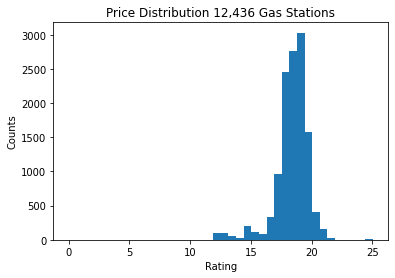

In [110]:
# At first glance the price distribution is near by a normal distribution. It must be like this because of the control pricing implemente by the government
plt.hist(Mexico_Gas_Stations3["gas_price"], bins=10)
plt.title("Price Distribution 12,436 Gas Stations")
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

array([[<AxesSubplot:title={'center':'diesel'}>,
        <AxesSubplot:title={'center':'premium'}>],
       [<AxesSubplot:title={'center':'regular'}>, <AxesSubplot:>]],
      dtype=object)

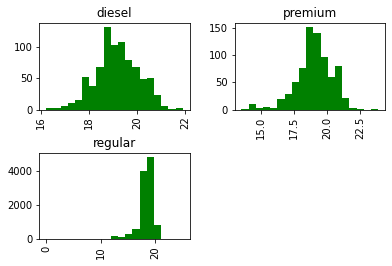

In [189]:
# there is less variation in the regular gas that in premium or diesel. even the average is really different for each one, getting a high probability of higher price in regular fuel than in premium or diesel
# However the higher prices are available in premium and diesel the probability of having a really higher price is very low in diesel and premium.
# Suggestion: Regular fuel is more inelastic than premium, perhaps... chat with the team  
Mexico_Gas_Stations3["gas_price"].hist(by=Mexico_Gas_Stations3["gas type"], bins=19, color="green")
# hacer loc para mantener precios actualizados poner en el mismo renglón
# aplicar propuesta de Sam https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/1/ch01lvl1sec16/plotting-multiple-bar-charts


In [195]:
diesel = Mexico_Gas_Stations3.loc[Mexico_Gas_Stations3["gas type"]=="diesel"]
premium = Mexico_Gas_Stations3.loc[Mexico_Gas_Stations3["gas type"]=="premium"]
regular = Mexico_Gas_Stations3.loc[Mexico_Gas_Stations3["gas type"]=="regular"]
diesel.mean() # Price mean $19.19
premium.mean() # Price mean $19.02
regular.mean() # Price mean $18.28


Unnamed: 0       6202.313294
index           16437.279230
Lng              -100.973460
Lat                22.239221
place_id         9739.046584
gas_price          18.288174
Rating              3.296962
User Ratings       55.324986
dtype: float64

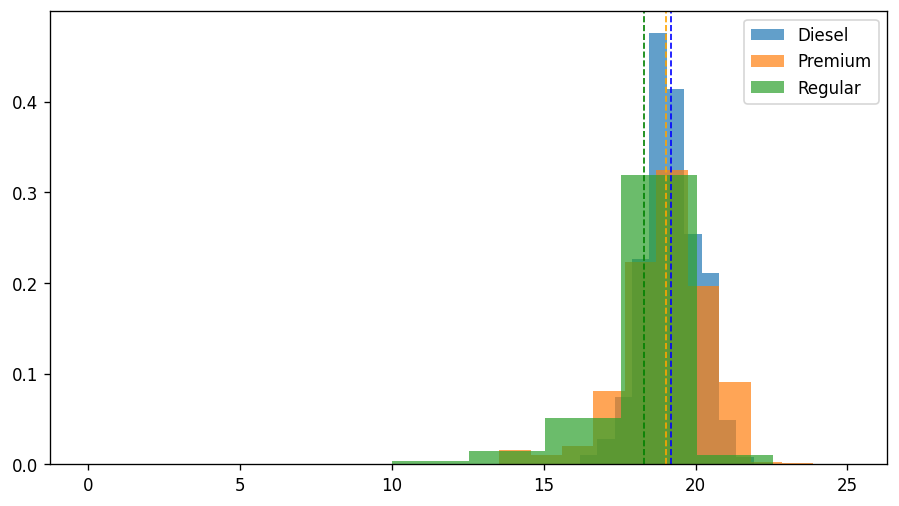

In [208]:
plt.figure(figsize=(9, 5), dpi=120)
plt.hist(diesel["gas_price"], 10, density=True, alpha=0.7, label="Diesel")
plt.hist(premium["gas_price"], 10, density=True, alpha=0.7, label="Premium")
plt.hist(regular["gas_price"], 10, density=True, alpha=0.7, label="Regular")
plt.axvline(diesel["gas_price"].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(premium["gas_price"].mean(), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(regular["gas_price"].mean(), color='green', linestyle='dashed', linewidth=1)
plt.legend()  

In [190]:


Mexico_Gas_Stations3["gas_price"].describe()

count    12436.000000
mean        18.392517
std          1.393100
min          0.010000
25%         17.890000
50%         18.590000
75%         19.200000
max         25.050000
Name: gas_price, dtype: float64

In [118]:
# lets know better distribution by ranges
pd.qcut(Mexico_Gas_Stations3["gas_price"],6)

0       (0.009000000000000001, 17.585]
1                       (18.59, 18.99]
2       (0.009000000000000001, 17.585]
3                       (18.59, 18.99]
4       (0.009000000000000001, 17.585]
                     ...              
2488                    (18.59, 18.99]
2489                    (18.05, 18.59]
2490                    (18.05, 18.59]
2491                   (17.585, 18.05]
2492    (0.009000000000000001, 17.585]
Name: gas_price, Length: 12436, dtype: category
Categories (6, interval[float64]): [(0.009000000000000001, 17.585] < (17.585, 18.05] < (18.05, 18.59] < (18.59, 18.99] < (18.99, 19.47] < (19.47, 25.05]]

In [161]:
# bins for gas price
np.percentile(Mexico_Gas_Stations3["gas_price"], np.arange(0,100, 20))
bins = [0,17.585,18.05,18.59,18.9,19.47,25.05]
names = ["<17.584", "17.585-18.04", "18.05-18.589", "18.59-18.989","18.99-19.469", "19.47-25.05"]
bins_price = Mexico_Gas_Stations3
bins_price["Gas Stations Price"]=pd.cut(bins_price["gas_price"], bins, labels=names)
bins_price2= bins_price.groupby("Gas Stations Price")
bins_price2= bins_price2[["Gas Stations Price", "Rating", "User Ratings"]]
B = bins_price2.mean()
B
#Mapa de calor de Sam con las 100 mejores y 100 peores (para confirmar relación precios y rating)

d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rating,User Ratings
Gas Stations Price,,
<17.584,3.258032,47.542209
17.585-18.04,3.308968,52.234330
18.05-18.589,3.317290,60.729907
18.59-18.989,3.321697,57.409974
18.99-19.469,3.335605,62.149271
19.47-25.05,3.227299,45.536786


array([<AxesSubplot:title={'center':'Rating'}, xlabel='Gas Stations Price'>,
       <AxesSubplot:title={'center':'User Ratings'}, xlabel='Gas Stations Price'>],
      dtype=object)

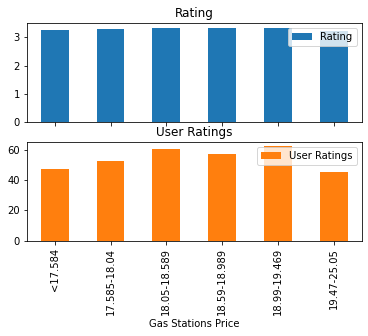

In [172]:
# Clearly the average rating is slightly lower in gas stations with lower and higher prices.
# Clarly the average User Ratings are higher in the center of the distribution. 
B.plot(kind="bar", subplots=True)

In [166]:
M = bins_price2.count()
M = M[["Rating"]]
M = M.rename(columns={"Rating":"Stations"})
M

,Stations
Gas Stations Price,
<17.584,2073
17.585-18.04,2074
18.05-18.589,2140
18.59-18.989,1544
18.99-19.469,2539
19.47-25.05,2066


Text(0.5, 1.0, 'Number of Stations')

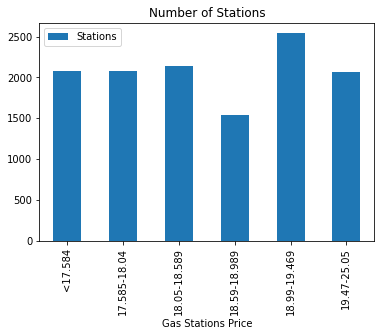

In [257]:
# 
M.plot(kind="bar")
plt.title("Number of Stations")

<AxesSubplot:ylabel='Stations'>

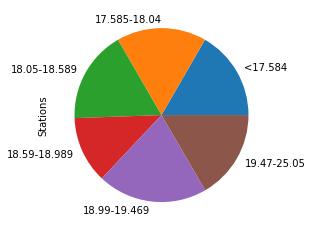

In [228]:
M["Stations"].plot(kind="pie") 

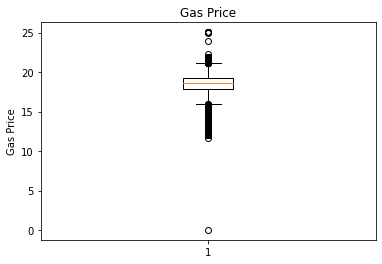

In [232]:
fig1, ax1 = plt.subplots()
ax1.set_title('Gas Price')
ax1.set_ylabel('Gas Price')
ax1.boxplot(Mexico_Gas_Stations3["gas_price"])
plt.show()

## <span style="color:blue"> User Ratings Analysis </span>

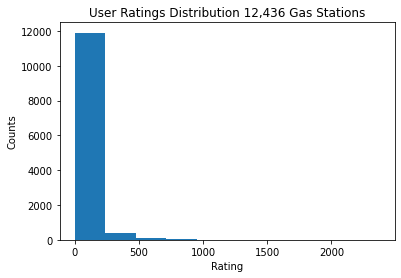

In [75]:
plt.hist(Mexico_Gas_Stations3["User Ratings"])
plt.title("User Ratings Distribution 12,436 Gas Stations")
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

In [133]:
Mexico_Gas_Stations4["User Ratings"].describe()

count    12423.000000
mean        54.525155
std        110.513972
min          0.000000
25%          2.000000
50%         17.000000
75%         61.500000
max       2374.000000
Name: User Ratings, dtype: float64

array([[<AxesSubplot:title={'center':'diesel'}>,
        <AxesSubplot:title={'center':'premium'}>],
       [<AxesSubplot:title={'center':'regular'}>, <AxesSubplot:>]],
      dtype=object)

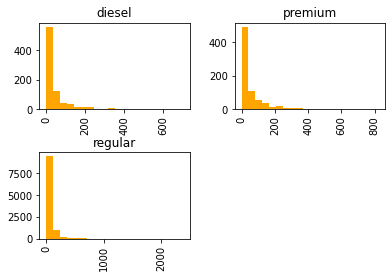

In [239]:
Mexico_Gas_Stations3["User Ratings"].hist(by=Mexico_Gas_Stations3["gas type"], color="orange", bins=20)

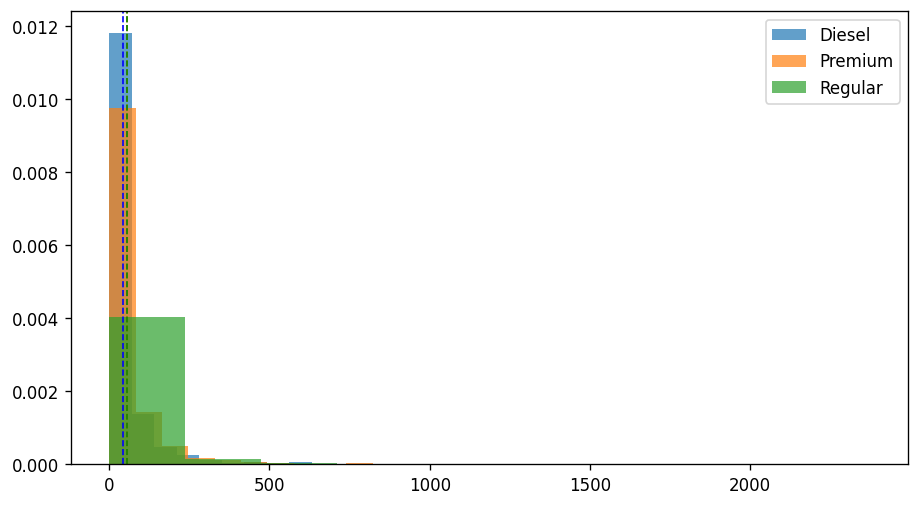

In [243]:
plt.figure(figsize=(9, 5), dpi=120)
plt.hist(diesel["User Ratings"], 10, density=True, alpha=0.7, label="Diesel")
plt.hist(premium["User Ratings"], 10, density=True, alpha=0.7, label="Premium")
plt.hist(regular["User Ratings"], 10, density=True, alpha=0.7, label="Regular")
plt.axvline(diesel["User Ratings"].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(premium["User Ratings"].mean(), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(regular["User Ratings"].mean(), color='green', linestyle='dashed', linewidth=1)
plt.legend()  

In [244]:
Mexico_Gas_Stations3["User Ratings"].describe()

count    12436.000000
mean        54.468318
std        110.470165
min          0.000000
25%          2.000000
50%         17.000000
75%         61.000000
max       2374.000000
Name: User Ratings, dtype: float64

In [245]:
pd.qcut(Mexico_Gas_Stations3["User Ratings"],6)

0           (1.0, 4.0]
1          (4.0, 17.0]
2       (95.0, 2374.0]
3       (95.0, 2374.0]
4          (4.0, 17.0]
             ...      
2488        (1.0, 4.0]
2489        (1.0, 4.0]
2490     (-0.001, 1.0]
2491        (1.0, 4.0]
2492       (4.0, 17.0]
Name: User Ratings, Length: 12436, dtype: category
Categories (6, interval[float64]): [(-0.001, 1.0] < (1.0, 4.0] < (4.0, 17.0] < (17.0, 41.0] < (41.0, 95.0] < (95.0, 2374.0]]

In [249]:
# bins for Rating
np.percentile(Mexico_Gas_Stations3["User Ratings"], np.arange(0,100, 20))
bins = [-0.001,1,4,17,41,95,2374]
names = ["<0.99", "1-3.99", "4-16.99", "17-40.99","41-94.99", "95-2374"]
bins_user = Mexico_Gas_Stations3
bins_user["Gas Stations Users"]=pd.cut(bins_price["User Ratings"], bins, labels=names)
bins_user2= bins_user.groupby(["Gas Stations Users"])
bins_user2= bins_user2[["Gas Stations Price", "Rating", "gas_price"]]
Z = bins_user2.mean()
Z

d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rating,gas_price
Gas Stations Users,,
<0.99,1.346643,18.381463
1-3.99,3.795840,18.441842
4-16.99,3.861586,18.371696
17-40.99,3.895319,18.410839
41-94.99,3.883366,18.359088
95-2374,3.885979,18.411904


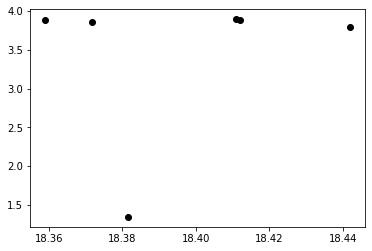

In [342]:
plt.plot(Z["gas_price"],Z["Rating"], 'o', color='black');

array([<AxesSubplot:title={'center':'Rating'}, xlabel='Gas Stations Users'>,
       <AxesSubplot:title={'center':'gas_price'}, xlabel='Gas Stations Users'>],
      dtype=object)

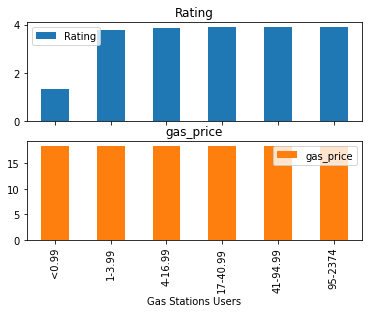

In [250]:
Z.plot(kind="bar", subplots=True)

In [254]:
Y = bins_user2.count()
Y = Y[["Rating"]]
Y = Y.rename(columns={"Rating":"Stations"})
Y

,Stations
Gas Stations Users,
<0.99,2830
1-3.99,1346
4-16.99,2093
17-40.99,2051
41-94.99,2062
95-2374,2054


Text(0.5, 1.0, 'Gas Stations Users')

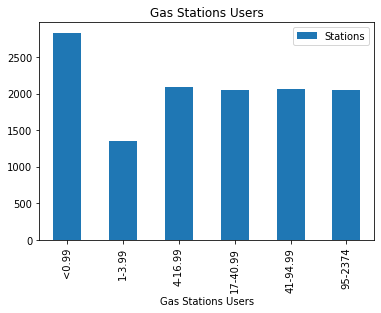

In [256]:
Y.plot(kind="bar")
plt.title("Gas Stations Users")

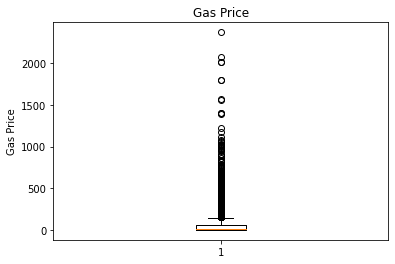

In [258]:
fig1, ax1 = plt.subplots()
ax1.set_title('Gas Price')
ax1.set_ylabel('Gas Price')
ax1.boxplot(Mexico_Gas_Stations3["User Ratings"])
plt.show()

## <span style="color:blue"> Looking for gas stations profiles </span>

In [309]:
# there is a particular pattern having in mind that 
pd.options.display.max_colwidth = 100 # so as to show all the strings
Mexico_Gas_Stations3
Max_UserRating = Mexico_Gas_Stations3.loc[Mexico_Gas_Stations3["User Ratings"]>=2374]
Max_UserRating = Max_UserRating[["gas_price", "Rating","Types","Address"]]
Max_UserRating

,gas_price,Rating,Types,Address
2071,18.79,4.4,"gas_station, restaurant, food, point_of_interest, store, establishment","Km. 105.8, México 49, Juan Aldama"


In [310]:
Max_UserRating["Types"]

2071    gas_station, restaurant, food, point_of_interest, store, establishment
Name: Types, dtype: object

In [338]:
Min_UserRating = Mexico_Gas_Stations3.loc[Mexico_Gas_Stations3["User Ratings"]==0]
Min_UserRating = Min_UserRating[["gas_price", "Rating","Types","Address", "User Ratings"]]
Min_UserRating

,gas_price,Rating,Types,Address,User Ratings
7,19.29,0.0,"gas_station, point_of_interest, establishment","Calle 15 590, Joyas de Anahuac, Cd Gral Escobedo",0.0
8,17.65,0.0,"gas_station, point_of_interest, establishment","Av Rayon 876, Secc Primera, Obrera, Ensenada",0.0
17,18.48,0.0,"gas_station, point_of_interest, establishment","Carret. Internacional Km 1170, San Cristóbal de las Casas",0.0
24,18.65,0.0,"gas_station, point_of_interest, establishment","Pedregal de Santo Domingo, San Nicolás de los Garza",0.0
27,17.55,0.0,"gas_station, point_of_interest, establishment","Blvd. Cuauhtemoc Sur 3658, Chulavista, Tijuana",0.0
...,...,...,...,...,...
2455,19.59,0.0,"gas_station, point_of_interest, establishment","Las Reynas, Irapuato",0.0
2457,19.09,0.0,"gas_station, point_of_interest, establishment","A Guanajuato No. 103, Zona Centro, Juventino Rosas",0.0
2458,17.70,0.0,"gas_station, point_of_interest, establishment","Carr. Acambaro - Jerecuaro, Km. 1, s/n, Centro, Acámbaro",0.0
2466,19.29,0.0,"gas_station, point_of_interest, establishment","Calle Postes 114, José María Pino Suárez, Ciudad de México",0.0


In [331]:
# As we can see, the profile for low rated stations is really simple only with gas tation, point of interest and stablishment

countby_type = Min_UserRating.groupby(Min_UserRating["Types"]).count()["Address"].to_frame()

countby_type
# hacerlo para todas las observaciones y 

,Address
Types,
"gas_station, atm, convenience_store, finance, food, point_of_interest, store, establishment",2
"gas_station, atm, finance, cafe, food, point_of_interest, establishment",2
"gas_station, convenience_store, cafe, food, point_of_interest, store, establishment",17
"gas_station, convenience_store, car_repair, food, point_of_interest, store, establishment",1
"gas_station, convenience_store, food, point_of_interest, store, establishment",10
"gas_station, point_of_interest, establishment",1783


In [ ]:
countby_type_df = Mexico_Gas_Stations3.groupby(Mexico_Gas_Stations3["gas type"]).count()["cre_id"].to_frame()

countby_type_df

In [312]:
profiles = Mexico_Gas_Stations3.groupby(["Types","Rating"]).mean()
profiles = profiles[["gas_price", "User Ratings"]]
profiles = profiles.reset_index()

profiles.sort_values(by=["Rating", "User Ratings"])

,Types,Rating,gas_price,User Ratings
1,"gas_station, atm, convenience_store, finance, food, point_of_interest, store, establishment",0.0,19.025000,0.000000
16,"gas_station, atm, finance, cafe, food, point_of_interest, establishment",0.0,18.065000,0.000000
51,"gas_station, convenience_store, cafe, food, point_of_interest, store, establishment",0.0,18.157647,0.000000
70,"gas_station, convenience_store, car_repair, food, point_of_interest, store, establishment",0.0,19.190000,0.000000
71,"gas_station, convenience_store, food, point_of_interest, store, establishment",0.0,18.877000,0.000000
...,...,...,...,...
134,"gas_station, point_of_interest, establishment",4.9,18.545000,7.937500
35,"gas_station, atm, finance, cafe, food, point_of_interest, establishment",5.0,19.107500,1.000000
135,"gas_station, point_of_interest, establishment",5.0,18.503949,1.523449
90,"gas_station, convenience_store, food, point_of_interest, store, establishment",5.0,18.290000,1.800000


In [296]:
profiles["Types"].unique()

array(['gas_station, atm, convenience_store, finance, cafe, food, point_of_interest, store, establishment',
       'gas_station, atm, convenience_store, finance, food, point_of_interest, store, establishment',
       'gas_station, atm, convenience_store, finance, restaurant, food, point_of_interest, store, establishment',
       'gas_station, atm, finance, cafe, food, point_of_interest, establishment',
       'gas_station, atm, finance, point_of_interest, establishment',
       'gas_station, cafe, food, point_of_interest, establishment',
       'gas_station, car_repair, point_of_interest, establishment',
       'gas_station, car_wash, car_repair, point_of_interest, establishment',
       'gas_station, car_wash, point_of_interest, establishment',
       'gas_station, convenience_store, cafe, food, point_of_interest, store, establishment',
       'gas_station, convenience_store, car_repair, food, point_of_interest, store, establishment',
       'gas_station, convenience_store, food, poin

In [337]:
Max_UserRating = Mexico_Gas_Stations3.loc[(Mexico_Gas_Stations3["User Ratings"]>=176) & (Mexico_Gas_Stations3["User Ratings"]<=2374)]
Max_UserRating = Max_UserRating[["gas_price", "Rating","Types","Address", "User Ratings"]]
Max_UserRating

,gas_price,Rating,Types,Address,User Ratings
2,12.82,4.3,"gas_station, point_of_interest, establishment","Av. López Mateos 1604, La Plata, Cd Juárez",261.0
35,18.99,3.8,"gas_station, point_of_interest, establishment","Calle Gral. Cepeda 2731, Agua Nueva, Saltillo",194.0
40,18.69,3.9,"gas_station, point_of_interest, establishment",Cto Exterior Mexiquense,762.0
44,19.09,4.2,"gas_station, point_of_interest, establishment","Carretera a Base Aerea Militar 3353, Valle Real, Zapopan",393.0
78,19.39,4.2,"gas_station, point_of_interest, establishment","Blvd. Adolfo López Mateos 1002 Ote, Fraccion del Coecillo, León",368.0
...,...,...,...,...,...
2332,17.60,3.7,"gas_station, point_of_interest, establishment","717 42111, Rancho la Colonia, México 85, San Antonio, Pachuca de Soto",176.0
2357,18.79,3.8,"gas_station, point_of_interest, establishment","Av Presidente Juárez No. 7, Puente de Vigas, Tlalnepantla de Baz",291.0
2425,18.35,3.9,"gas_station, point_of_interest, establishment","Carr, Carmen - Puerto Real s/n, Luis Donaldo Colosio Murrieta, Cd del Carmen",265.0
2436,18.59,3.8,"gas_station, point_of_interest, establishment","PIRAMIDES-TULANCINGO, KM 37.62, México 132D, Axapusco",309.0


In [339]:
countby_type2 = Max_UserRating.groupby(Max_UserRating["Types"]).count()["Address"].to_frame()

countby_type2
# los ratings si están asociados con los tipos pero los datos no son tan segmentados, no son suficientes para saber cuáles son los que 
# tienen mejor rating
# Ver si están geográficamente en alguna zona, urgabana o restaurante.

,Address
Types,
"gas_station, atm, convenience_store, finance, food, point_of_interest, store, establishment",2
"gas_station, atm, finance, cafe, food, point_of_interest, establishment",20
"gas_station, atm, finance, point_of_interest, establishment",1
"gas_station, car_wash, point_of_interest, establishment",2
"gas_station, convenience_store, cafe, food, point_of_interest, store, establishment",11
"gas_station, convenience_store, food, point_of_interest, store, establishment",2
"gas_station, convenience_store, grocery_or_supermarket, food, point_of_interest, store, establishment",1
"gas_station, convenience_store, restaurant, food, point_of_interest, store, establishment",1
"gas_station, point_of_interest, establishment",864


## <span style="color:blue"> Geografic Analysis </span>

In [357]:
Mexico_Gas_Stations4["User Ratings"].median()

NameError: name 'Mexico_Gas_Stations4' is not defined

In [354]:
ratings = Mexico_Gas_Stations4.loc[Mexico_Gas_Stations4["User Ratings"] > 0]
len(ratings)

NameError: name 'Mexico_Gas_Stations4' is not defined

In [137]:
quartiles = ratings["User Ratings"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 6.0
The upper quartile of temperatures is: 74.0
The interquartile range of temperatures is: 68.0
The the median of temperatures is: 26.0 
Values below -96.0 could be outliers.
Values above 176.0 could be outliers.


<IPython.core.display.Javascript object>


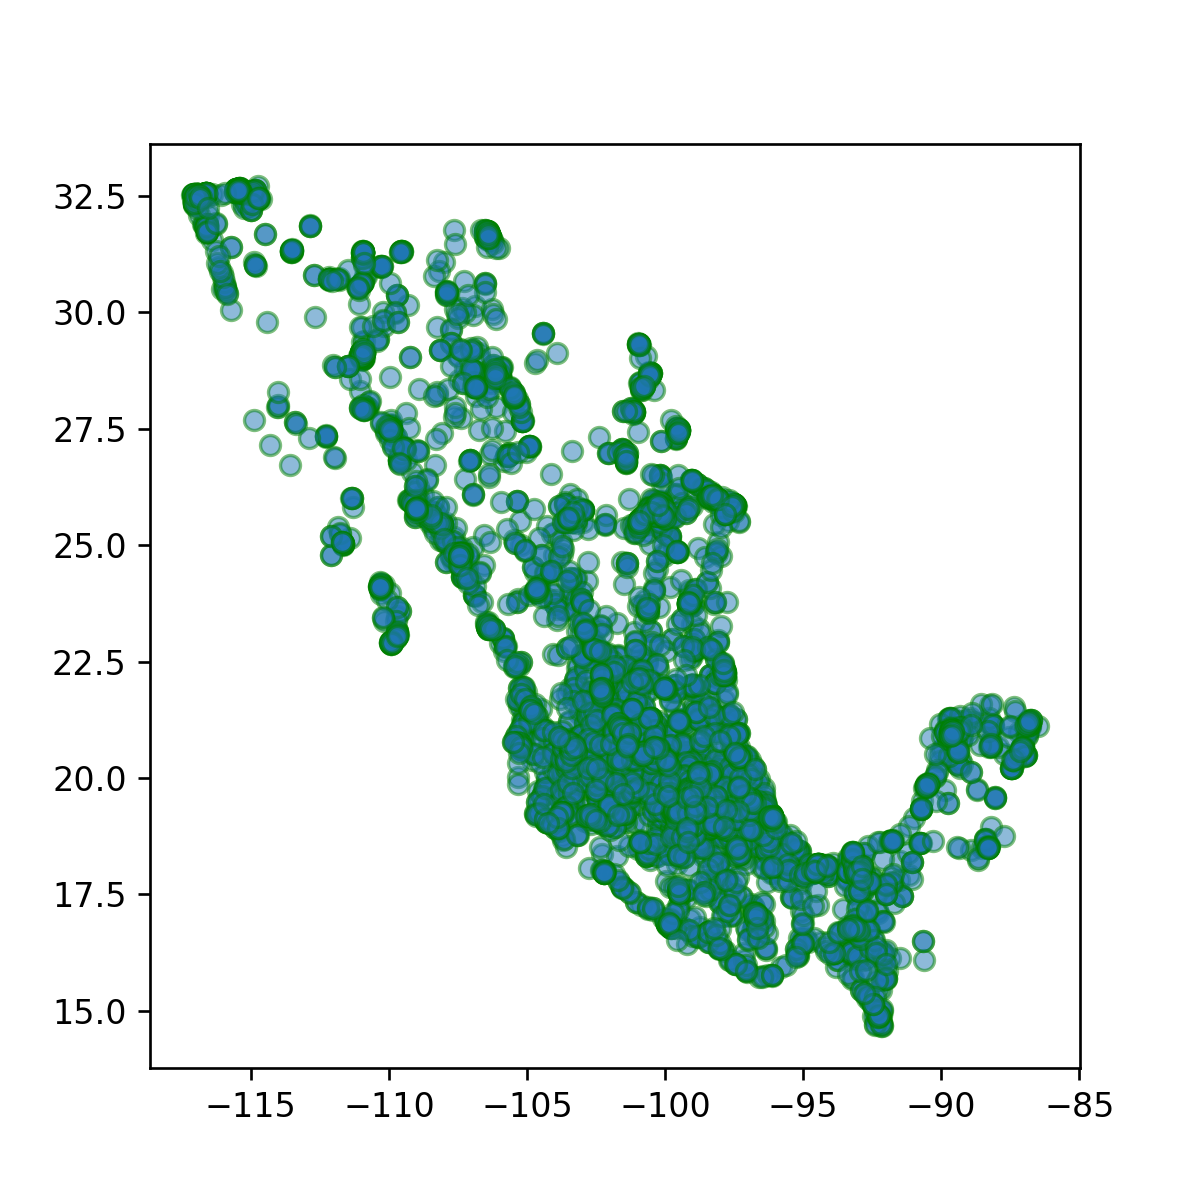

In [145]:
#beans (Sam) tomar las reseñas mayores a cero.
Mexico_Gas_Stations4 = ratings.loc[ratings["Lng"]<=50]
plt.figure(figsize=(5, 5), dpi=120)
plt.scatter(ratings["Lng"],ratings["Lat"], edgecolor="green", alpha=0.5)



In [356]:
sub = ratings.loc[ratings["Rating"] >= 4]

NameError: name 'ratings' is not defined

<IPython.core.display.Javascript object>


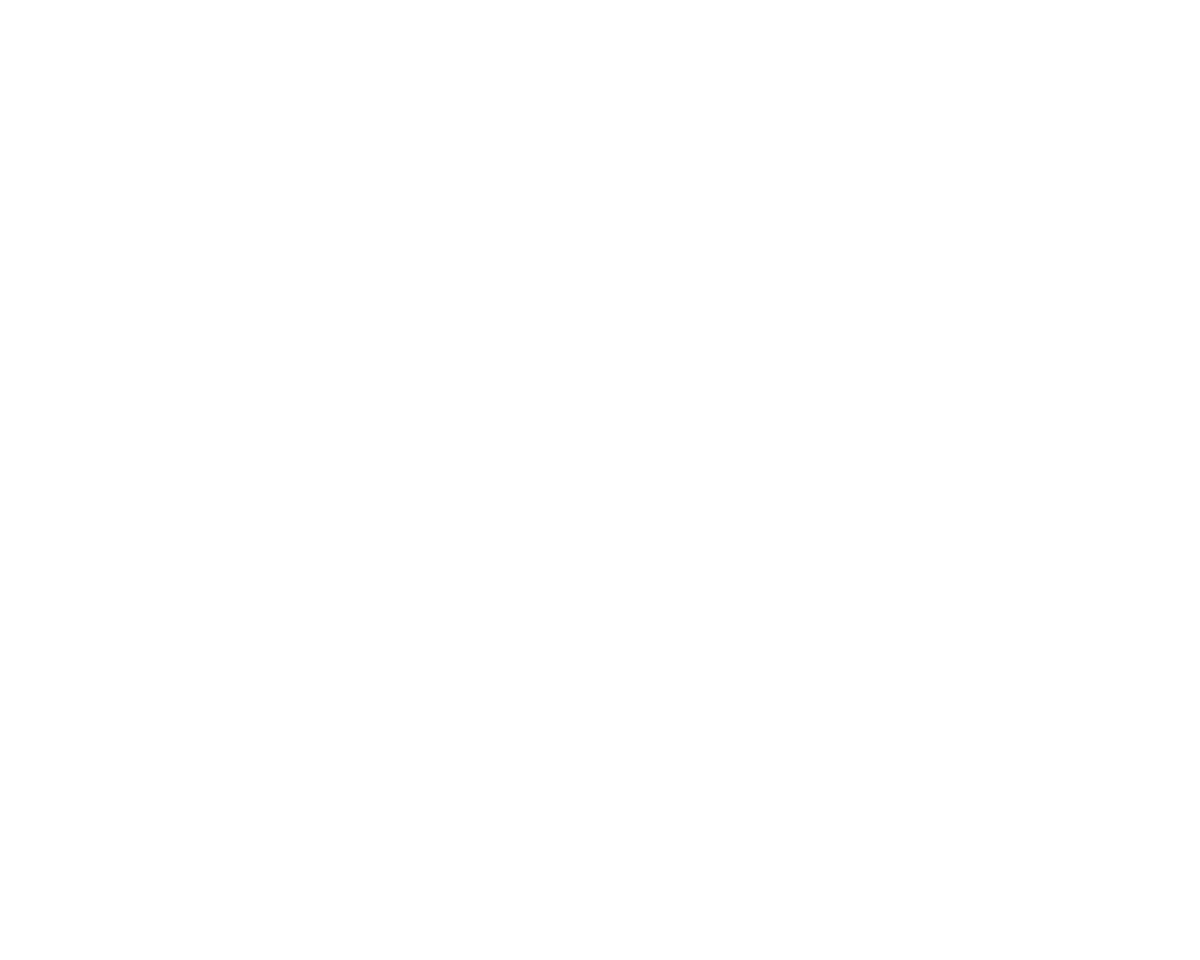

NameError: name 'sub' is not defined

<IPython.core.display.Javascript object>


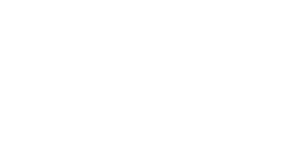

In [355]:
%matplotlib notebook
plt.figure(figsize=(10, 8), dpi=120)
plt.hexbin(sub["Lng"],sub["Lat"], C=sub["Rating"])
cb=plt.colorbar()
cb.set_label("Rating")

In [6]:
countby_type_df = Gas_Stations_df.groupby(Gas_Stations_df["type"]).count()["place_id"].to_frame()
countby_type_df = countby_type_df.rename(columns={"place_id":"Stations"})
countby_type_df

,Stations
type,
diesel,9271
premium,11552
regular,12392


In [7]:
regular_gas = Gas_Stations_df.loc[Gas_Stations_df["type"]=="regular"]
premium_gas = Gas_Stations_df.loc[Gas_Stations_df["type"]=="premium"]
diesel_gas = Gas_Stations_df.loc[Gas_Stations_df["type"]=="diesel"]

In [8]:
lng_regular_gas = regular_gas["lng"]
lat_regular_gas = regular_gas["lat"]
lng_premium_gas = premium_gas["lng"]
lat_premium_gas = premium_gas["lat"]
lng_diesel_gas = diesel_gas["lng"]
lat_diesel_gas = diesel_gas["lat"]

In [9]:
premium_gas.head()

,name,cre_id,lng,lat,place_id,gas_price,type
1,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,19.35,premium
4,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.99,premium
7,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,13.59,premium
9,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,19.39,premium
12,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,16.39,premium


In [10]:
diesel_gas.head()

,name,cre_id,lng,lat,place_id,gas_price,type
2,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,18.45,diesel
5,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.89,diesel
10,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.74,diesel
15,MULTISERVICIOS LA PILARICA SA DE CV,PL/371/EXP/ES/2015,-108.96850,25.75580,2045,19.99,diesel
20,"PETROMAX, S.A. DE C.V.",PL/439/EXP/ES/2015,-100.29180,25.77202,2046,19.49,diesel


In [11]:
regular_gas.head()

,name,cre_id,lng,lat,place_id,gas_price,type
0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular
3,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular
6,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,12.82,regular
8,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.64,regular
11,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,14.79,regular
